# AB Testing

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, shapiro, levene, ttest_ind, mannwhitneyu, kstest, stats, spearmanr

## Data Understanding

In [2]:
df=pd.read_csv('ab_testing.csv')
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


The main independent feature is Group, while the dependent features are page views, time spent, and conversion. However, device and location can also be analyzed for a better understanding of whether the Group impacts these dependent features or whether device and location themselves affect page views, time spent, and conversion.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [4]:
df.duplicated().any()

False

No missing value and duplicated data

In [5]:
category=['Group','Conversion','Device','Location']
numeric=['Page Views','Time Spent']
df[category].describe()

,Group,Conversion,Device,Location
count,5000,5000,5000,5000
unique,2,2,2,4
top,A,No,Desktop,Scotland
freq,2519,4515,2538,1281


In [6]:
df['Location'].value_counts()

Location
Scotland            1281
England             1246
Northern Ireland    1242
Wales               1231
Name: count, dtype: int64

The category value makes sense, and it is good to know that the test will be held in the United Kingdom.

In [7]:
df[numeric].describe()

,Page Views,Time Spent
count,5000.000000,5000.000000
mean,7.537600,242.512600
std,4.022465,118.254153
min,1.000000,40.000000
25%,4.000000,137.000000
50%,8.000000,243.000000
75%,11.000000,346.000000
max,14.000000,449.000000


The numeric value makes sense, and it should be mentioned that time spent is measured in seconds.

## Data Understanding Summary

- Independent Feature: Group
- Dependent Features: Page views, time spent, and conversion
- Additional Analysis: Device and location can also be analyzed to understand their impact on dependent features.
- Data Quality: No missing values or duplicated data.
- Category Value: Valid, with the test being held in the United Kingdom.
- Numeric Value: Valid, with time spent measured in seconds.

## Bivariate Analysis

### Group x Main Dependent Features

In [27]:
pd.crosstab(df['Group'],df['Conversion'],normalize='index')

Conversion,No,Yes
Group,,
A,0.946010,0.053990
B,0.859331,0.140669


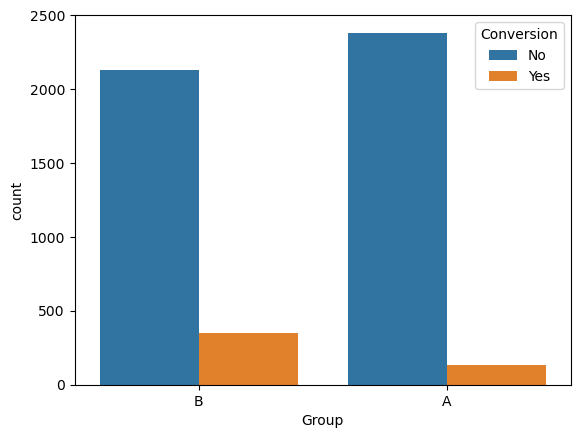

In [9]:
sns.countplot(x='Group',data=df,hue='Conversion');

Visually, it seems that B treatment give a significant impact to the conversion

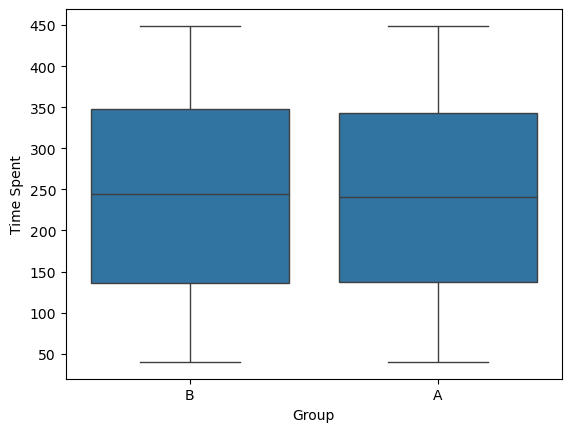

In [10]:
sns.boxplot(x='Group',y='Time Spent',data=df);

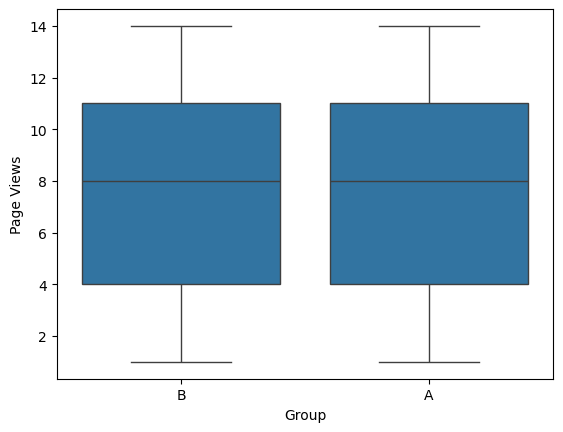

In [11]:
sns.boxplot(x='Group',y='Page Views',data=df);

On the other hand, B treatment does not give any significant impact to time spent and page views

### Other Features

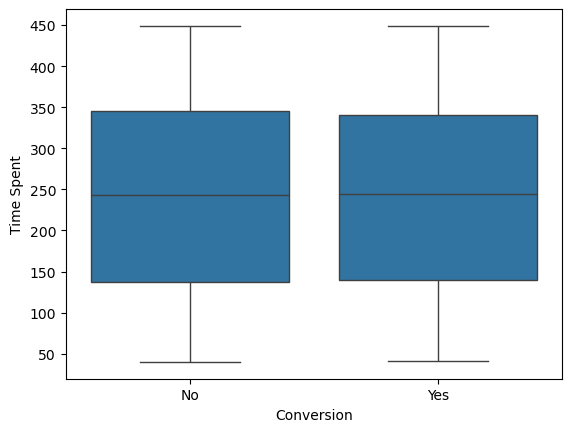

In [12]:
sns.boxplot(x='Conversion',y='Time Spent',data=df);

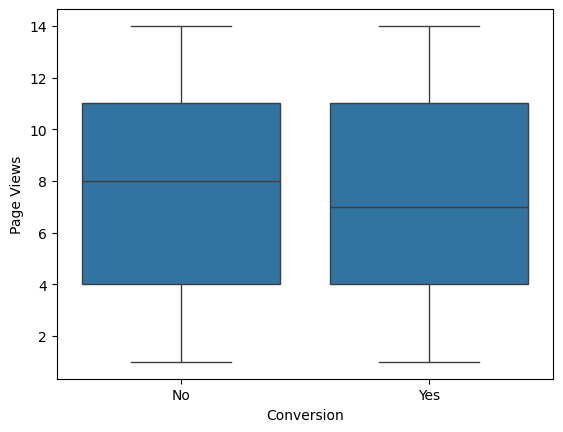

In [24]:
sns.boxplot(x='Conversion',y='Page Views',data=df);

while time spent does not seem to have a significant impact on conversion, page views do, where fewer page views lead to a conversion.

In [23]:
correlation_matrix.corr()

,Time Spent,Page Views
Time Spent,1.000000,-0.001484
Page Views,-0.001484,1.000000


Time spent and page views themselves do not have any correlation.

In [28]:
pd.crosstab(df['Device'],df['Conversion'],normalize='index')

Conversion,No,Yes
Device,,
Desktop,0.900315,0.099685
Mobile,0.905768,0.094232


<Axes: xlabel='Device', ylabel='count'>

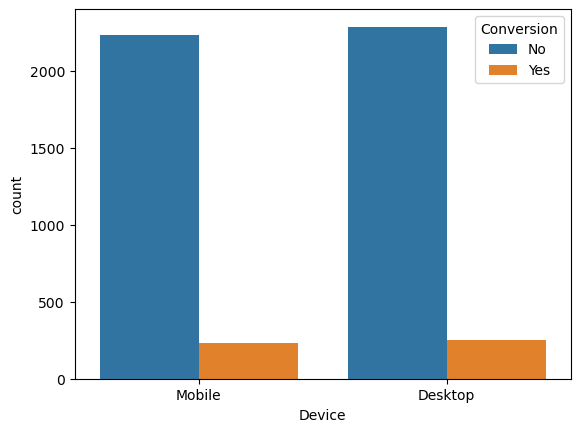

In [32]:
sns.countplot(x='Device',data=df,hue='Conversion')

Desktop has a slightly higher rate of conversion

In [31]:
pd.crosstab(df['Location'],df['Conversion'],normalize='index').sort_values(by='Yes',ascending=False)

Conversion,No,Yes
Location,,
England,0.890851,0.109149
Wales,0.901706,0.098294
Scotland,0.902420,0.097580
Northern Ireland,0.917069,0.082931


<Axes: xlabel='Location', ylabel='count'>

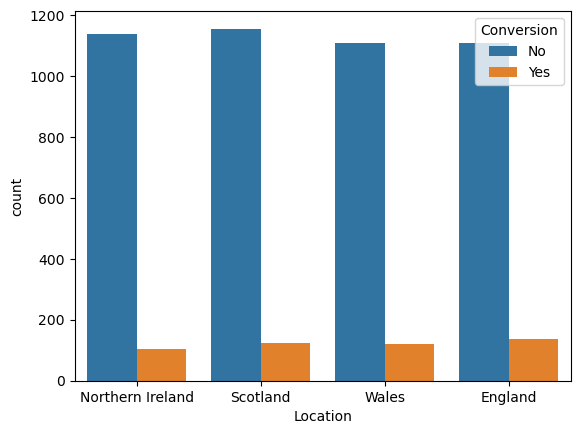

In [35]:
sns.countplot(x='Location',data=df,hue='Conversion')

England has the highest conversion, followed by wales, scotland, and northern ireland

## Bivariate Analysis Summary

- The B treatment appears to have a significant positive impact on conversion.
- The B treatment does not have a significant impact on time spent and page views.
- Time spent does not seem to significantly impact conversion.
- Page views do impact conversion, where fewer page views are associated with a higher likelihood of conversion.
- Time spent and page views do not have any correlation with each other.
- Desktop has a slightly higher rate of conversion
- England has the highest conversion, followed by wales, scotland, and northern ireland

## Hypothesis

### Primary Hypothesis

#### H1: Treatment B has a positive and significant impact on conversion rates compared to Treatment A.
H0: Treatment B does not have a significant impact on conversion rates compared to Treatment A.

### Secondary Hypothesis

#### H2: Treatment B does not significantly impact time spent on the page.
H0: Treatment B significantly impacts time spent on the page.
#### H3: Treatment B does not significantly impact page views.
H0: Treatment B significantly impacts page views.
#### H4: Time spent on the page does not have a significant correlation with conversion rates.
H0: Time spent on the page has a significant correlation with conversion rates.
#### H5: Page views have a negative correlation with conversion rates, where fewer page views are associated with higher conversion rates.
H0: Page views do not have a significant correlation with conversion rates.
#### H6: Time spent on the page and page views do not have a significant correlation with each other.
H0: Time spent on the page and page views have a significant correlation with each other.
#### H7: Desktop users have a higher conversion rate compared to mobile users.
H0: Desktop users do not have a higher conversion rate compared to mobile users.
#### H8: Conversion rates differ significantly across regions, with England having the highest conversion rate, followed by Wales, Scotland, and Northern Ireland.
H0: There is no significant difference in conversion rates across regions.

## Statistical Test

### Primary Hypothesis

In [46]:
contingency_table=pd.crosstab(df['Group'],df['Conversion'])
contingency_table

Conversion,No,Yes
Group,,
A,2383,136
B,2132,349


In [47]:
alpha=0.05
chi2, p, _, _=chi2_contingency(contingency_table)
if p<alpha:
    print(f'The difference in conversion rate accross {'Group'} is statistically significant since the P value is {p}')
else:
    print('There is no significant difference')

The difference in conversion rate accross Group is statistically significant since the P value is 6.571736018334222e-25


### Secondary Hypothesis

#### Group and Time Spent Test

In [86]:
# kolmogorov smirnov is used since the dataset is large (5000)
ks_stat_A,ks_p_value_A=kstest(df[df['Group']=='A']['Time Spent'],'norm')
ks_stat_A,ks_p_value_B=kstest(df[df['Group']=='B']['Time Spent'],'norm')
print(ks_p_value_A)
print(ks_p_value_B)
# The data is not normal, mannwhitneyu test will be used

0.0
0.0


In [87]:
# mannwhitneyu test
u_stat,u_p_value=mannwhitneyu(df[df['Group']=='A']['Time Spent'],df[df['Group']=='B']['Time Spent'])
u_p_value

0.6420301034033706

The p values is higher than 0.05, means that the difference in time spent of each group is not significant

#### Group and Page Views Test

In [89]:
# kolmogorov smirnov is used since the dataset is large (5000)
ks_stat_A,ks_p_value_A=kstest(df[df['Group']=='A']['Page Views'],'norm')
ks_stat_A,ks_p_value_B=kstest(df[df['Group']=='B']['Page Views'],'norm')
print(ks_p_value_A)
print(ks_p_value_B)
# The data is not normal, mannwhitneyu test will be used

0.0
0.0


In [90]:
# mannwhitneyu test
u_stat,u_p_value=mannwhitneyu(df[df['Group']=='A']['Page Views'],df[df['Group']=='B']['Page Views'])
u_p_value

0.42467839841511335

The p values is higher than 0.05, means that the difference in page views of each group is not significant

#### Conversion and Time Spent Test

In [49]:
# kolmogorov smirnov is used since the dataset is large (5000)
ks_stat_A,ks_p_value_A=kstest(df[df['Conversion']=='Yes']['Time Spent'],'norm')
ks_stat_A,ks_p_value_B=kstest(df[df['Conversion']=='No']['Time Spent'],'norm')
print(ks_p_value_A)
print(ks_p_value_B)
# The data is not normal, mannwhitneyu test will be used

0.0
0.0


In [50]:
# mannwhitneyu test
u_stat,u_p_value=mannwhitneyu(df[df['Conversion']=='Yes']['Time Spent'],df[df['Conversion']=='No']['Time Spent'])
u_p_value

0.8876205916265301

The p values is higher than 0.05, means that the difference in time spent of each conversion is not significant

#### Conversion and Page Views Test

In [51]:
# kolmogorov smirnov is used since the dataset is large (5000)
ks_stat_A,ks_p_value_A=kstest(df[df['Conversion']=='Yes']['Page Views'],'norm')
ks_stat_A,ks_p_value_B=kstest(df[df['Conversion']=='No']['Page Views'],'norm')
print(ks_p_value_A)
print(ks_p_value_B)
# The data is not normal, mannwhitneyu test will be used

0.0
0.0


In [52]:
# mannwhitneyu test
u_stat,u_p_value=mannwhitneyu(df[df['Conversion']=='Yes']['Page Views'],df[df['Conversion']=='No']['Page Views'])
u_p_value

0.19308420920890446

The p values is higher than 0.05, means that the difference in page views of each conversion is not significant

#### Time Spent and Page Views

In [54]:
# kolmogorov smirnov is used since the dataset is large (5000)
ks_stat_A,ks_p_value_A=kstest(df['Page Views'],'norm')
ks_stat_A,ks_p_value_B=kstest(df['Time Spent'],'norm')
print(ks_p_value_A)
print(ks_p_value_B)
# The data is not normal, so spearman will be used for the correlation validation

0.0
0.0


In [62]:
corr, p_value=spearmanr(df['Page Views'],df['Time Spent'])
print(corr)
print(p_value)

-0.0013794925797965746
0.9223130447290918


The correlation is not significant

#### Conversion and Device

In [63]:
contingency_table_device=pd.crosstab(df['Device'],df['Conversion'])
contingency_table_device

Conversion,No,Yes
Device,,
Desktop,2285,253
Mobile,2230,232


In [67]:
alpha=0.05
chi2, p, _, _=chi2_contingency(contingency_table_device)
if p<alpha:
    print(f'The difference in conversion rate accross group and device is statistically significant since the P value is {p}')
else:
    print('There is no significant difference of conversion in each device')

There is no significant difference of conversion in each device


#### Conversion and Location

In [65]:
contingency_table_location=pd.crosstab(df['Location'],df['Conversion'])
contingency_table_location

Conversion,No,Yes
Location,,
England,1110,136
Northern Ireland,1139,103
Scotland,1156,125
Wales,1110,121


In [68]:
alpha=0.05
chi2, p, _, _=chi2_contingency(contingency_table_location)
if p<alpha:
    print(f'The difference in conversion rate accross group and device is statistically significant since the P value is {p}')
else:
    print('There is no significant difference of conversion in each location')

There is no significant difference of conversion in each location


## Statistical Test Summary

### Primary Hypothesis

#### H1
- Finding: The difference in conversion rates across Group A and Group B is statistically significant (p-value: 6.57e-25, less than 0.05).
- Conclusion: We reject the null hypothesis (H0) and accept H1: Treatment B has a positive and significant impact on conversion rates compared to Treatment A.

### Secondary Hypothesis

#### H2
- Finding: The p-value for the difference in time spent between groups is greater than 0.05, indicating no significant difference.
- Conclusion: We fail to reject the null hypothesis (H0) and accept H2: Treatment B does not significantly impact time spent on the page.
#### H3
- Finding: The p-value for the difference in page views between groups is greater than 0.05, indicating no significant difference.
- Conclusion: We fail to reject the null hypothesis (H0) and accept H3: Treatment B does not significantly impact page views.
#### H4
- Finding: The p-value for the relationship between time spent and conversion is greater than 0.05, indicating no significant correlation.
- Conclusion: We fail to reject the null hypothesis (H0) and accept H4: Time spent on the page does not have a significant correlation with conversion rates.
#### H5
- Finding: The p-value for the relationship between page views and conversion is greater than 0.05, indicating no significant correlation.
- Conclusion: We fail to reject the null hypothesis (H0) and reject H5: Page views do not significantly correlate with conversion rates.
#### H6
- Finding: The correlation between time spent and page views is not significant.
- Conclusion: We fail to reject the null hypothesis (H0) and accept H6: Time spent on the page and page views do not have a significant correlation with each other.
#### H7
- Finding: There is no significant difference in conversion rates between devices (e.g., desktop vs. mobile).
- Conclusion: We fail to reject the null hypothesis (H0) and reject H7: Device type does not significantly impact conversion rates.
#### H8
- Finding: There is no significant difference in conversion rates across regions (e.g., England, Wales, Scotland, and Northern Ireland).
- Conclusion: We fail to reject the null hypothesis (H0) and reject H8: Location does not significantly impact conversion rates.